In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score, f1_score, log_loss

In [2]:
param_array = pd.read_csv("parameters/parameter_array.csv").set_index("PARAM")

In [3]:
param_array

,AIRPORTS,LOOKAHEAD,DATA,CONFIG_SUPPORT,EPOCHS,NUMBER_TRIALS,PATIENCE
PARAM,,,,,,,
1,katl,1,PD,0,300,100,10
2,kclt,1,PD,0,300,100,10
3,kden,1,PD,0,300,100,10
4,kdfw,1,PD,0,300,100,10
5,kjfk,1,PD,0,300,100,10
...,...,...,...,...,...,...,...
716,kmem,12,PD_SM,1,300,100,10
717,kmia,12,PD_SM,1,300,100,10
718,kord,12,PD_SM,1,300,100,10


In [4]:
Param_Nums = []
DFs = []

Not_Finishes = []
for param in param_array.index:
    
    try:
        df = pd.read_csv(f"Results/Result_{param}/results_df.csv")
        Param_Nums.append(param)
        DFs.append(df)
        
        
    except:
        
        Not_Finishes.append(param)

    
df = pd.concat(DFs)
df["PARAM"] = Param_Nums
df = pd.merge(df, param_array, on="PARAM")

In [5]:
np.unique(df.columns)

array(['AIRPORTS', 'CONFIG_SUPPORT', 'DATA', 'EPOCHS', 'LOOKAHEAD',
       'NUMBER_TRIALS', 'PARAM', 'PATIENCE', 'Unnamed: 0',
       'config_support', 'norm_support', 'param', 'test_accuracy',
       'test_f1', 'test_loss', 'train_accuracy', 'train_f1', 'train_loss',
       'val_accuracy', 'val_f1', 'val_loss'], dtype=object)

In [20]:
pd.set_option("display.max_rows", 500)
df.groupby(["CONFIG_SUPPORT","DATA"]).mean()["train_loss"]

CONFIG_SUPPORT  DATA 
0               PD       0.075853
                PD_SM    0.045894
                SM       0.044632
1               PD       0.073656
                PD_SM    0.048155
                SM       0.047377
Name: train_loss, dtype: float64

<AxesSubplot:xlabel='LOOKAHEAD', ylabel='config_support'>

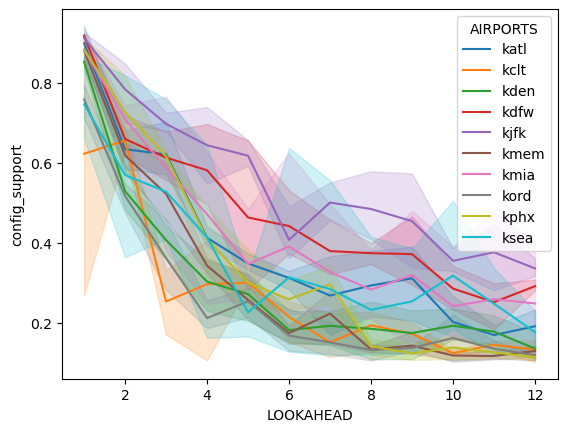

In [16]:
small_df = df[df.CONFIG_SUPPORT==1]
small_df.groupby(["AIRPORTS","LOOKAHEAD"]).mean()[["config_support","norm_support"]]

sns.lineplot(data=small_df,x="LOOKAHEAD",y="config_support",hue="AIRPORTS")

<AxesSubplot:xlabel='LOOKAHEAD', ylabel='norm_support'>

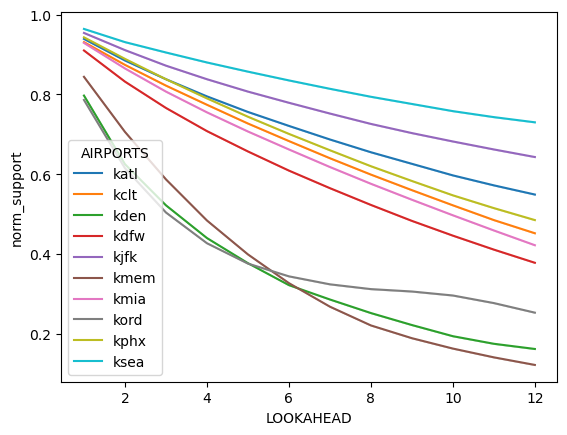

In [17]:
sns.lineplot(data=small_df,x="LOOKAHEAD",y="norm_support",hue="AIRPORTS")

In [8]:
small_df = df[df.CONFIG_SUPPORT==1]
df.groupby(["CONFIG_SUPPORT","DATA"]).mean()[["config_support","norm_support"]]

config_support  norm_support
CONFIG_SUPPORT DATA                               
0              PD          -1.000000       0.60905
               PD_SM       -1.000000       0.60905
               SM          -1.000000       0.60905
1              PD           0.406860       0.60905
               PD_SM        0.351998       0.60905
               SM           0.340968       0.60905

In [9]:
param_array.loc[Not_Finishes]

,AIRPORTS,LOOKAHEAD,DATA,CONFIG_SUPPORT,EPOCHS,NUMBER_TRIALS,PATIENCE
PARAM,,,,,,,
